<a href="https://colab.research.google.com/github/muhammadtarek98/deep-learning-curve-A.I-solutions-internship/blob/main/ANN_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import tensorflow
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import SGD
import cv2 as cv
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import normalize
import matplotlib.pyplot as plt

In [ ]:
def image_reader(dir):
  lst=[]
  for image in os.listdir(dir):
    if "png" in image or "jpg" in image or "jpeg" in image or "PNG" in image or "JPG" in image or "JPEG" in image:
          img=cv.imread(dir+image,cv.IMREAD_GRAYSCALE)
          try:
            img=cv.resize(img,(80,80))
          except:
            print(image)
          lst.append(img)
  return np.array(lst)
def data_set_2():
  data_set_dict=dict()
  data_set_lst=[]
  negative_lst=image_reader("/content/drive/MyDrive/task_3_dataset/data_set_2/Negative/")
  positive_lst=image_reader("/content/drive/MyDrive/task_3_dataset/data_set_2/Positive/")
  data_set_dict[1]=positive_lst
  data_set_dict[0]=negative_lst
  data_set_lst.append(positive_lst)
  data_set_lst.append(negative_lst)
  data_set_lst=np.array(data_set_lst)
  #del positive_lst,negative_lst
  return data_set_dict,data_set_lst

In [ ]:
data_set_dict,data_set_lst=data_set_2()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
def show(class_name,class_num):
  for i in range(0,10):
    plt.imshow(data_set_dict[class_num][i],cmap="gray")
    plt.show()
    print(data_set_dict[class_num][i].shape)

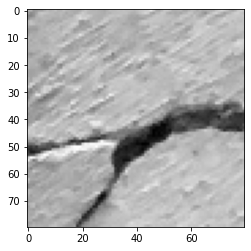

(80, 80)


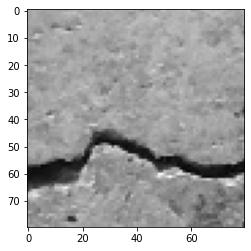

(80, 80)


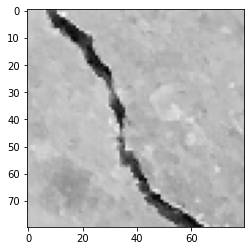

(80, 80)


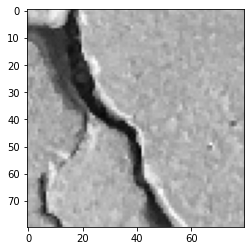

(80, 80)


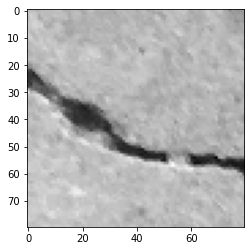

(80, 80)


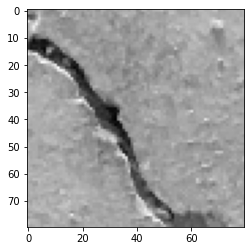

(80, 80)


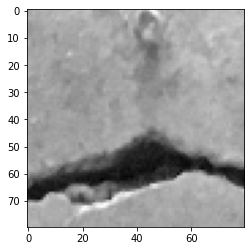

(80, 80)


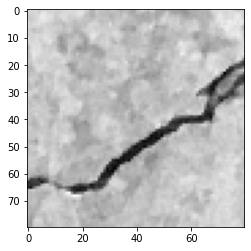

(80, 80)


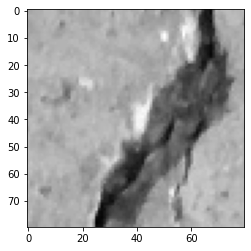

(80, 80)


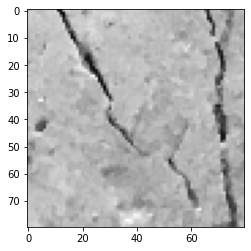

(80, 80)


In [ ]:
show('Positive',1)

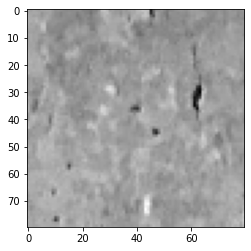

(80, 80)


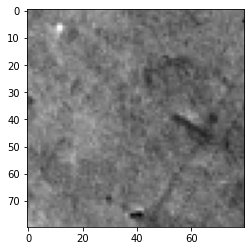

(80, 80)


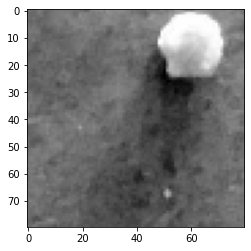

(80, 80)


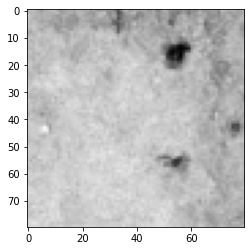

(80, 80)


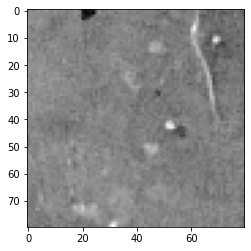

(80, 80)


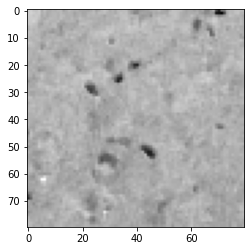

(80, 80)


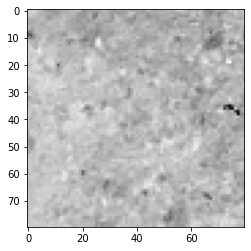

(80, 80)


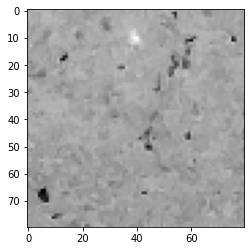

(80, 80)


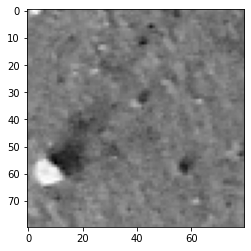

(80, 80)


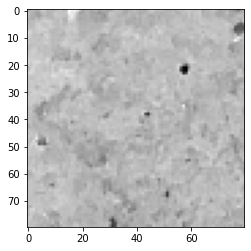

(80, 80)


In [ ]:
show('Negative',0)

In [ ]:
training_input_images=[]
training_targets=[]
class_label=0
for images in data_set_lst:
  for image in images:
    training_input_images.append(image)
    training_targets.append(class_label)
  class_label+=1
training_targets=np.array(training_targets)
training_input_images=np.array(training_input_images)
print(len(training_targets))
print(len(training_input_images))
print(np.array(training_input_images).shape)
counter_0=counter_1=0
for i in training_targets:
  if i ==1:
    counter_1+=1
  elif i==0:
    counter_0+=1

print(counter_1)
print(counter_0)
print(counter_0+counter_1)
#del data_set_dict

37604
37604
(37604, 80, 80)
17604
20000
37604


In [ ]:
training_input_images=normalize(training_input_images,axis=1)

In [ ]:
print(training_input_images.shape)
print(training_input_images[0])

(37604, 80, 80)
[[0.11566113 0.1174475  0.10636952 ... 0.12103034 0.12340312 0.12081419]
 [0.10748307 0.10167097 0.10462576 ... 0.12383197 0.11949442 0.11582645]
 [0.09872086 0.09933371 0.1040445  ... 0.12047002 0.11949442 0.11915161]
 ...
 [0.11507698 0.11511024 0.10636952 ... 0.11038415 0.10888511 0.10806774]
 [0.10923551 0.1098514  0.11450708 ... 0.11094448 0.11614411 0.11748903]
 [0.11040381 0.11511024 0.11741335 ... 0.11654774 0.11893604 0.11970581]]


In [ ]:
model=Sequential()
model.add(Flatten())
model.add(Dense(units=40,activation="relu"))
model.add(Dense(units=80,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

In [ ]:
model.compile(optimizer=SGD(learning_rate=0.01),loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
history=model.fit(x=training_input_images,y=training_targets,epochs=50,shuffle=True,validation_split=0.3,use_multiprocessing=True)

Epoch 1/50
823/823 [==============================] - 7s 5ms/step - loss: 0.5526 - accuracy: 0.7595 - val_loss: 1.4203 - val_accuracy: 0.0000e+00
Epoch 2/50
823/823 [==============================] - 3s 4ms/step - loss: 0.5333 - accuracy: 0.7598 - val_loss: 1.3797 - val_accuracy: 0.0000e+00
Epoch 3/50
823/823 [==============================] - 3s 4ms/step - loss: 0.4914 - accuracy: 0.7598 - val_loss: 0.9854 - val_accuracy: 0.0000e+00
Epoch 4/50
823/823 [==============================] - 3s 4ms/step - loss: 0.4319 - accuracy: 0.7591 - val_loss: 0.7909 - val_accuracy: 0.0000e+00
Epoch 5/50
823/823 [==============================] - 4s 5ms/step - loss: 0.3851 - accuracy: 0.7612 - val_loss: 0.7350 - val_accuracy: 0.3443
Epoch 6/50
823/823 [==============================] - 3s 4ms/step - loss: 0.3556 - accuracy: 0.7943 - val_loss: 0.8348 - val_accuracy: 0.3438
Epoch 7/50
823/823 [==============================] - 3s 4ms/step - loss: 0.3354 - accuracy: 0.8134 - val_loss: 0.5956 - val_accurac

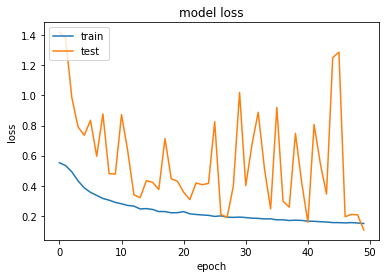

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

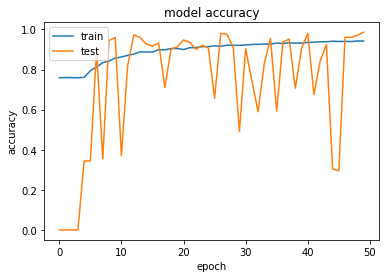

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()